# Set up 

In [1]:
import numpy as np
import os
import pandas as pd 
import unidecode
import unicodedata
import datetime
import random
import datetime
from datetime import datetime
from datetime import timedelta
import math
from math import sqrt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

## Import data

In [2]:
calls = pd.read_csv('148.csv', sep=',')
districts = pd.read_csv('Partidos.csv', sep=',')

In [3]:
display(calls[:4])
display(districts[:4])

,Tipo de documento,Número de documento,Nombre,Apellido,Edad,Número de teléfono,Dirección,Municipio,Localidad,Localidad.1,...,¿Por qué se seleccinó un país de riesgo?,País de riesgo,Fiebre,Otros sintomas,Origen,Descripción de caso (CRM),Número de caso (CRM),Fecha de creación,Última actualización,Fecha de importación
0,DNI,18560131,Rosa Mabel,Cáseres,53,1160061942,Asamblea 5741,LA MATANZA,ISIDRO CASANOVA,ISIDRO CASANOVA,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,hace referencia al caso 136039\nsu esposo se h...,147137,03/08/2020 15:42,03/08/2020 15:43,03/08/2020 12:45
1,DNI,35860477,Gisela Andrea,Molina,31,1138556913,Guanabara 1185,LA MATANZA,VIRREY DEL PINO,VIRREY DEL PINO,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,1-SÍNTOMAS= perdida del olfato y perdida del g...,147134,03/08/2020 15:42,03/08/2020 15:42,03/08/2020 12:45
2,DNI,28686561,Blanca Alejandra,Jimenez,39,1123658643,Santa Fe 1610,MERLO,MERLO,MERLO,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,Síntomas: Pérdida del olfato hace 3 días y di...,147128,03/08/2020 15:40,03/08/2020 15:42,03/08/2020 12:45
3,DNI,34386009,gustavo nicolas,ayala,31,1123046180,santiago delkis 826,FLORENCIO VARELA,FLORENCIO VARELA,FLORENCIO VARELA,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,1: perdida del olfato y gusto desde ayer\n2: n...,147127,03/08/2020 15:40,03/08/2020 15:41,03/08/2020 12:45


,Partido,Municipio,Poblacion
0,1,La Matanza,1772130
1,2,La Plata,649613
2,3,General Pueyrredón,614350
3,4,Lomas de Zamora,613192


In [4]:
print(len(calls),len(districts))

11336 134


# Parse and normalize data 

In [5]:
# This function converts all to lower-case and no spaces
def reduce(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if unicodedata.category(x)[0] == 'L').lower()

## Process: Calls

In [13]:
# Replace the 2 unmatching names
for i in range(len(calls)):
    j = str(calls.iloc[i]['Municipio'])
    if j != 'nan': 
        if j == 'NUEVE DE JULIO': j = '9 de julio'
        if j == 'CORONEL DE MARINA LEONARDO ROSALES': j = 'CORONEL DE MARINA L ROSALES'
        tmpname = reduce(j)
        calls.iloc[i,calls.columns.get_loc('Municipio')] = tmpname
    if j == 'nan': calls.iloc[i,calls.columns.get_loc('Municipio')] = tmpname

In [14]:
calls.rename(columns={'Fecha de creación': 'Fecha y hora'}, inplace=True)

In [15]:
# Delete time in Date&Time column
for i in range(len(calls)):
    j = str(calls.iloc[i]['Fecha y hora'])
    # Get rid of hour
    tmpname=j.split()[0]
    # Convert it to datetime format
    calls.iloc[i,calls.columns.get_loc('Fecha y hora')] = datetime.strptime(tmpname, '%d/%m/%Y')    

ValueError: time data '2020-08-03' does not match format '%d/%m/%Y'

In [16]:
display(calls[:4])
len(calls)

,Tipo de documento,Número de documento,Nombre,Apellido,Edad,Número de teléfono,Dirección,Municipio,Localidad,Localidad.1,...,¿Por qué se seleccinó un país de riesgo?,País de riesgo,Fiebre,Otros sintomas,Origen,Descripción de caso (CRM),Número de caso (CRM),Fecha y hora,Última actualización,Fecha de importación
0,DNI,18560131,Rosa Mabel,Cáseres,53,1160061942,Asamblea 5741,lamatanza,ISIDRO CASANOVA,ISIDRO CASANOVA,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,hace referencia al caso 136039\nsu esposo se h...,147137,2020-08-03 00:00:00,03/08/2020 15:43,03/08/2020 12:45
1,DNI,35860477,Gisela Andrea,Molina,31,1138556913,Guanabara 1185,lamatanza,VIRREY DEL PINO,VIRREY DEL PINO,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,1-SÍNTOMAS= perdida del olfato y perdida del g...,147134,2020-08-03 00:00:00,03/08/2020 15:42,03/08/2020 12:45
2,DNI,28686561,Blanca Alejandra,Jimenez,39,1123658643,Santa Fe 1610,merlo,MERLO,MERLO,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,Síntomas: Pérdida del olfato hace 3 días y di...,147128,2020-08-03 00:00:00,03/08/2020 15:42,03/08/2020 12:45
3,DNI,34386009,gustavo nicolas,ayala,31,1123046180,santiago delkis 826,florenciovarela,FLORENCIO VARELA,FLORENCIO VARELA,...,NaN,ARGENTINA,Tiene o ha tenido 38 grados o más de fiebre,No,CRM-148,1: perdida del olfato y gusto desde ayer\n2: n...,147127,2020-08-03 00:00:00,03/08/2020 15:41,03/08/2020 12:45


11336

In [17]:
import datetime
today= datetime.datetime.now().date()
newcolumn=[]
for i in range(len(calls)):
    if (today - calls['Fecha y hora'][i].date()).days < 15:
        newcolumn.append(1)
    else:
        newcolumn.append(0)
calls['newcolumn'] = newcolumn

In [18]:
calls.drop(calls[calls.newcolumn == 0].index, inplace=True)

In [19]:
len(calls)

11336

In [20]:
calls = calls.reset_index()

## Process: Partidos

In [21]:
# Just reduce the names
for i in range(len(districts)):
    j = str(districts.iloc[i]['Municipio'])
    if j != 'nan': 
        tmpname = reduce(j)
        districts.iloc[i,districts.columns.get_loc('Municipio')] = tmpname

In [22]:
display(districts[:4])

,Partido,Municipio,Poblacion
0,1,lamatanza,1772130
1,2,laplata,649613
2,3,generalpueyrredon,614350
3,4,lomasdezamora,613192


## Check that all Municipio names are in main DF Districts 

In [23]:
notin=[]
count=0
for i in range(len(calls)):
    tmp= calls['Municipio'][i]
    if tmp not in districts['Municipio'].tolist():
        notin.append(tmp)
        count = count+1
notin = list(dict.fromkeys(notin))
print(notin)
print(count)

[]
0


## Alarm parameters

There are  9.84e-06 +/- 4.92e-07  calls for each inhabitant per day<br>
There are  0.86 +/- 0.49  calls for each case

In [24]:
B = 9.84*10**(-6) # Background calls per inhabitants
S = 0.8           # Signal calls per case
DB = 4.92*10**(-7)# Delta Background
DS = 0.49         # Delta Signal
S95 = S + 2 * DS  # calls/case @ 95% CL
# A note on S95: Since the number of calls/cases S=0.8+/-0.49 comes from a 
#                sample very low in statistics, we take as fixed the conservative
#                S95 = S + 2DS = 1.78 the number of calls/cases.
#                This is a conservative choice because what we really
#                can measure estimate is a deviation from the background-only
#                hypothesis, and not really the number of cases. 
#                This is important to bear in mind!

In [25]:
import datetime
# Select either line to play real today or another one to calibrate
#today = datetime.date(2020,5,23)
today= datetime.datetime.now().date()
today = today - timedelta(days=1) # USE THIS IF TODAY DATA IS NOT IN THE DATASET
print(today)

2020-08-03


# Let's fill up the analysis array

We want a dataframe whose rows include this information for each Municipio:

['Municipio', population, expected_calls_per_day, its_uncertainty, calls_last_day, calls_last_2-days, calls_last_4-days] 

In [26]:
data=[]
for n_district in range(len(districts)):
    # Iterate on the district names
    tmp_district = districts['Municipio'][n_district]
    N_inhabitants = districts['Poblacion'][n_district]
    print("Computing district #: ",n_district," (",tmp_district,")")
    # Go through the whole calls df
    calls1 = 0
    calls2 = 0
    calls3 = 0
    calls4 = 0
    Delta1 = 0
    Delta2 = 0
    Delta3 = 0
    Delta4 = 0
    Delta5 = 0
    Delta6 = 0
    for i in range(len(calls)):
        if calls['Municipio'][i] == tmp_district:
            if 0 < (today - calls['Fecha y hora'][i].date()).days <= 1:
                calls1 = calls1 + 1
            if 0 < (today - calls['Fecha y hora'][i].date()).days <= 2:
                calls2 = calls2 + 1
            if 0 < (today - calls['Fecha y hora'][i].date()).days <= 3:
                calls3 = calls3 + 1
            if 0 < (today - calls['Fecha y hora'][i].date()).days <= 4:
                calls4 = calls4 + 1    
            if (today - calls['Fecha y hora'][i].date()).days == 1: Delta1 = Delta1 + 1
            if (today - calls['Fecha y hora'][i].date()).days == 2: Delta2 = Delta2 + 1
            if (today - calls['Fecha y hora'][i].date()).days == 3: Delta3 = Delta3 + 1
            if (today - calls['Fecha y hora'][i].date()).days == 4: Delta4 = Delta4 + 1
            if (today - calls['Fecha y hora'][i].date()).days == 5: Delta5 = Delta5 + 1
            if (today - calls['Fecha y hora'][i].date()).days == 6: Delta6 = Delta6 + 1            
    expected_calls = B * N_inhabitants
    data.append([tmp_district, N_inhabitants, expected_calls, calls1, calls2, calls3, calls4, Delta1, Delta2, Delta3, Delta4, Delta5, Delta6])

Computing district #:  0  ( lamatanza )
Computing district #:  1  ( laplata )
Computing district #:  2  ( generalpueyrredon )
Computing district #:  3  ( lomasdezamora )
Computing district #:  4  ( quilmes )
Computing district #:  5  ( almirantebrown )
Computing district #:  6  ( merlo )
Computing district #:  7  ( moreno )
Computing district #:  8  ( lanus )
Computing district #:  9  ( florenciovarela )
Computing district #:  10  ( generalsanmartin )
Computing district #:  11  ( sanmiguel )
Computing district #:  12  ( tigre )
Computing district #:  13  ( tresdefebrero )
Computing district #:  14  ( avellaneda )
Computing district #:  15  ( malvinasargentinas )
Computing district #:  16  ( berazategui )
Computing district #:  17  ( moron )
Computing district #:  18  ( bahiablanca )
Computing district #:  19  ( estebanecheverria )
Computing district #:  20  ( pilar )
Computing district #:  21  ( sanisidro )
Computing district #:  22  ( vicentelopez )
Computing district #:  23  ( josecp

# Create Alarm Table

We want a table whose content in each row is<br>
['Municipio',population, estimated_cases_1-day,its_uncertainty, estimated_cases_2-dat, its_uncertainty,...etc]

In [27]:
alarm=[]
for i in range(len(data)):
    
    cases1 = (data[i][3] - 1 * data[i][2])/S95
    Dcases1 = sqrt( (DB * 1 * data[i][1])**2 + data[i][2] + data[i][3] )/S95
    
    cases2 = (data[i][4] - 2 * data[i][2])/S95
    Dcases2 = sqrt( ( DB * 2 * data[i][1])**2 + 2 * data[i][2] + data[i][4] )/S95
    
    cases3 = (data[i][5] - 3 * data[i][2])/S95
    Dcases3 = sqrt( ( DB * 3 * data[i][1])**2 + 3 * data[i][2] + data[i][5] )/S95
    
    cases4 = (data[i][6] - 4* data[i][2])/S95
    Dcases4 = sqrt( ( DB * 4 * data[i][1])**2 + 4 * data[i][2] + data[i][6] )/S95
    
    casesDelta1 = (data[i][7] - 1* data[i][2])/S95
    casesDelta2 = (data[i][8] - 1* data[i][2])/S95
    casesDelta3 = (data[i][9] - 1* data[i][2])/S95
    casesDelta4 = (data[i][10] - 1* data[i][2])/S95
    casesDelta5 = (data[i][11] - 1* data[i][2])/S95
    casesDelta6 = (data[i][12] - 1* data[i][2])/S95
    
    xi_casesDelta1 = sqrt( ( DB * data[i][1])**2 + data[i][2] + data[i][7] )/S95
    xi_casesDelta2 = sqrt( ( DB * data[i][1])**2 + data[i][2] + data[i][8] )/S95
    xi_casesDelta3 = sqrt( ( DB * data[i][1])**2 + data[i][2] + data[i][9] )/S95
    
    alarm.append([districts['Municipio'][i],districts['Poblacion'][i], cases1, Dcases1, cases2, Dcases2, cases3, Dcases3, cases4, Dcases4, casesDelta1, casesDelta2, casesDelta3, casesDelta4, casesDelta5, casesDelta6, xi_casesDelta1, xi_casesDelta2, xi_casesDelta3])

In [28]:
alarm[:1]

[['lamatanza',
  1772130,
  102.0012588764045,
  8.279571414472208,
  197.82274247191012,
  11.580616486866013,
  333.53186651685394,
  14.918401283669898,
  463.6230130337079,
  17.55933953261278,
  102.0012588764045,
  95.82148359550563,
  135.70912404494382,
  130.09114651685394,
  153.12485438202245,
  136.8327195505618,
  8.279571414472208,
  8.067187796355793,
  9.35351836000866]]

##  Plot 2-day

In [29]:
# absolute = [Municipio, cases, 95%CL uncertainty, minimum cases @ 95%CL]
absolute2 = [[x[0],x[4]/2,x[5]/2,(x[4]-x[5])/2] for x in alarm]
absolute2.sort(key=lambda x:-x[3])
# relative = [Municipio, cases per 100k, 95%CL uncertainty, minimum cases per 100k @ 95%CL]
relative2 = [[x[0],x[4]*100000/(2*x[1]),x[5]*100000/(2*x[1]),(x[4]-x[5])*100000/(2*x[1]) ] for x in alarm]
relative2.sort(key=lambda x:-x[3])

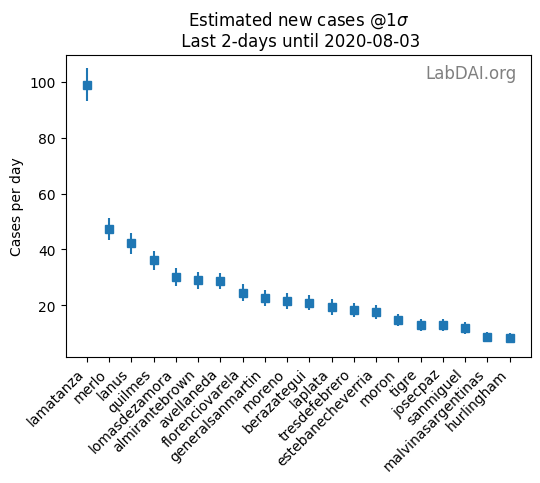

In [30]:
testlist = absolute2[:20]
x = range(len(testlist))
y = [x[1] for x in testlist]
e = [x[2] for x in testlist]
plt.figure(dpi=100)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Cases per day')
plt.title('Estimated new cases @$1\sigma$\n Last 2-days until '+str(today))
plt.text(.97,.97,'LabDAI.org',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
#plt.savefig('figs/'+str(today)+'_absolute_2-Days_PBA.png',bbox_inches='tight')
plt.show()

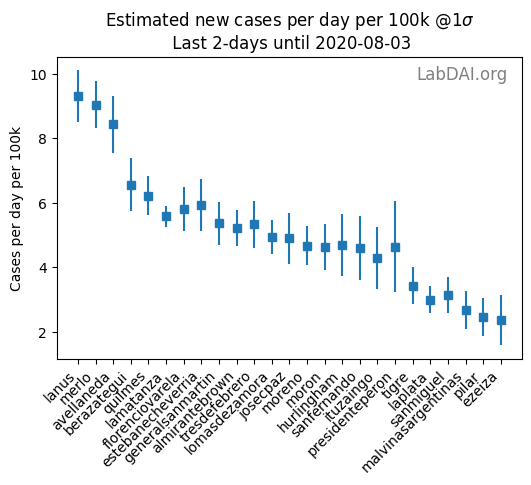

In [31]:
testlist = relative2[:25]
x = range(len(testlist))
y = [x[1] for x in testlist]
e = [x[2] for x in testlist]
plt.figure(dpi=100)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Cases per day per 100k')
plt.title('Estimated new cases per day per 100k @$1\sigma$\n Last 2-days until '+str(today))
plt.text(.97,.97,'LabDAI.org',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
#plt.savefig('figs/'+str(today)+'_relative_2-Days_PBA.png',bbox_inches='tight')
plt.show()

# Create Tendency Table

We want a table whose content in each row is<br>
['Municipio',population, tendency sloper, tendency slope uncertainty]

## Absolute 

In [32]:
# Define function to fit (straight line)
def func(x, m, b):
        return m * x + b
xdata = np.array([-3,-2,-1])
tendency=[]
for i in range(len(alarm)):
    ydata = np.array([alarm[i][12],alarm[i][11],alarm[i][10]])
    sigmas = np.array([alarm[i][18],alarm[i][17],alarm[i][16]])
    # We fit using the uncertainty in the data.  Here is a non-fully satisfactory explanation on how it works the sigma: https://stackoverflow.com/questions/31704940/using-the-absolute-sigma-parameter-in-scipy-optimize-curve-fit
    popt, pcov = curve_fit(func, xdata, ydata, sigma=sigmas, absolute_sigma=True)
    tendency.append([districts['Municipio'][i],districts['Poblacion'][i], popt[0], math.sqrt(pcov[0][0]),popt[0]/math.sqrt(pcov[0][0])])

/home/franco/snap/jupyter/common/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


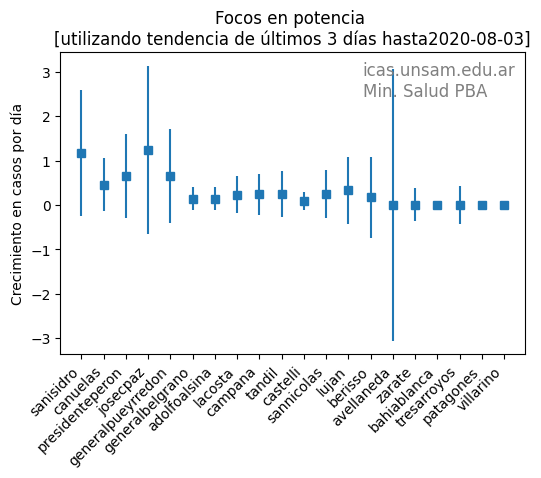

In [33]:
tendency.sort(key=lambda x:-x[4])
testlist = tendency[:20]
x = range(len(testlist))
y = [x[2] for x in testlist]
e = [x[3] for x in testlist]
plt.figure(dpi=100)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Crecimiento en casos por día')
plt.title('Focos en potencia \n[utilizando tendencia de últimos 3 días hasta'+str(today)+']')
plt.text(.65,.97,'icas.unsam.edu.ar\nMin. Salud PBA',ha='left',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
#plt.savefig('figs/'+str(today)+'_Worst-absolute-tendency_PBA.png',bbox_inches='tight')
plt.show()

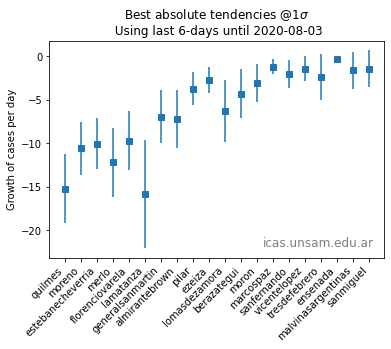

In [34]:
tendency.sort(key=lambda x:x[4])
testlist = tendency[:20]
x = range(len(testlist))
y = [x[2] for x in testlist]
e = [x[3] for x in testlist]
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Growth of cases per day')
plt.title('Best absolute tendencies @$1\sigma$\n Using last 6-days until '+str(today))
plt.text(.97,.1,'icas.unsam.edu.ar',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
#plt.savefig('figs/'+str(today)+'_Best-absolute-tendency_PBA.png',bbox_inches='tight')
plt.show()

## Relative @ 100k inhabitants

In [35]:
# Define function to fit (straight line)
def func(x, m, b):
        return m * x + b
xdata = np.array([-3,-2,-1])
tendency=[]
for i in range(len(alarm)):
    ydata = np.array([alarm[i][12]*100000/alarm[i][1],alarm[i][11]*100000/alarm[i][1],alarm[i][10]*100000/alarm[i][1]])
    sigmas = np.array([alarm[i][18]*100000/alarm[i][1],alarm[i][17]*100000/alarm[i][1],alarm[i][16]*100000/alarm[i][1]])
    popt, pcov = curve_fit(func, xdata, ydata, sigma=sigmas, absolute_sigma=True)
    tendency.append([districts['Municipio'][i],districts['Poblacion'][i], popt[0], math.sqrt(pcov[0][0]),popt[0]/math.sqrt(pcov[0][0])])

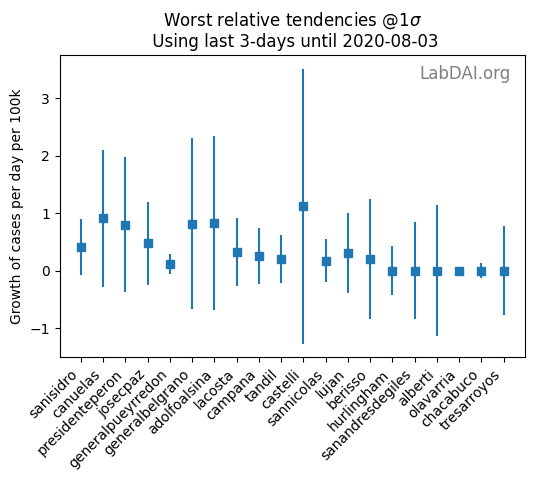

In [36]:
tendency.sort(key=lambda x:-x[4])
testlist = tendency[:20]
x = range(len(testlist))
y = [x[2] for x in testlist]
e = [x[3] for x in testlist]
plt.figure(dpi=100)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Growth of cases per day per 100k')
plt.title('Worst relative tendencies @$1\sigma$\n Using last 3-days until '+str(today))
plt.text(.97,.97,'LabDAI.org',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
plt.savefig('figs/'+str(today)+'_Worst-relative-tendency_PBA.png',bbox_inches='tight')
plt.show()

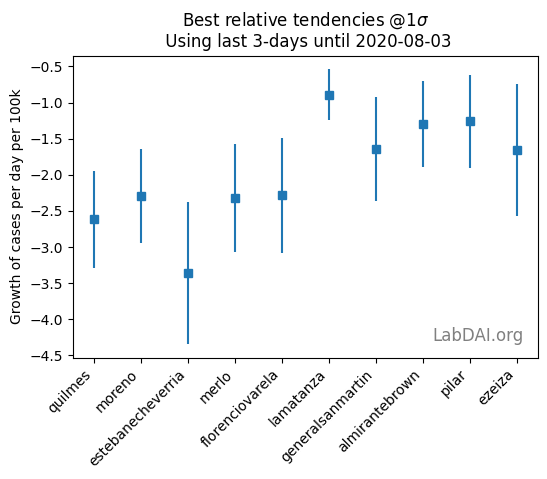

In [37]:
tendency.sort(key=lambda x:x[4])
testlist = tendency[:10]
x = range(len(testlist))
y = [x[2] for x in testlist]
e = [x[3] for x in testlist]
plt.figure(dpi=100)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(x, [x[0] for x in testlist], rotation=45, ha='right')
plt.ylabel('Growth of cases per day per 100k')
plt.title('Best relative tendencies @$1\sigma$\n Using last 3-days until '+str(today))
plt.text(.97,.1,'LabDAI.org',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
if not os.path.isdir('figs'): os.makedirs('figs')
plt.savefig('figs/'+str(today)+'_Best-relative-tendency_PBA.png',bbox_inches='tight')
plt.show()

# Get district evolution in last days

In [38]:
print(districts['Municipio'].tolist())

['lamatanza', 'laplata', 'generalpueyrredon', 'lomasdezamora', 'quilmes', 'almirantebrown', 'merlo', 'moreno', 'lanus', 'florenciovarela', 'generalsanmartin', 'sanmiguel', 'tigre', 'tresdefebrero', 'avellaneda', 'malvinasargentinas', 'berazategui', 'moron', 'bahiablanca', 'estebanecheverria', 'pilar', 'sanisidro', 'vicentelopez', 'josecpaz', 'escobar', 'hurlingham', 'ituzaingo', 'ezeiza', 'sanfernando', 'sannicolas', 'tandil', 'zarate', 'olavarria', 'lujan', 'pergamino', 'campana', 'necochea', 'junin', 'berisso', 'generalrodriguez', 'presidenteperon', 'lacosta', 'azul', 'chivilcoy', 'mercedes', 'coroneldemarinalrosales', 'sanvicente', 'sanpedro', 'tresarroyos', 'ensenada', 'marcospaz', 'canuelas', 'chacabuco', 'dejulio', 'balcarce', 'trenquelauquen', 'chascomus', 'lincoln', 'bragado', 'pehuajo', 'generalalvarado', 'coronelsuarez', 'lobos', 'demayo', 'bolivar', 'ramallo', 'baradero', 'salto', 'saladillo', 'villagesell', 'generalvillegas', 'patagones', 'villarino', 'exaltaciondelacruz', 

In [53]:
# Introduce district name from list
testmuni = 'tapalque'

In [54]:
key=districts.index[districts['Municipio'] == testmuni].tolist()
#import datetime
## Select either line to play real today or another one to calibrate
##today = datetime.date(2020,5,22)
#today= datetime.datetime.now().date()
#today = today - timedelta(days=1) # Use this if today's data is not in the dataset
fromday = today - timedelta(days=7)
print('Plot will be from ',fromday,' to ',today)

Plot will be from  2020-07-27  to  2020-08-03


In [55]:
import datetime
delta = today - fromday
Ndays = int(delta.days)
data_individual=[]
for ndays in range(Ndays):    
    testday = fromday + timedelta(days=ndays)
    print('Collecting calls from day '+str(testday)+' and district '+testmuni)
    n_district = key[0]
    # Iterate on the district names
    tmp_district = districts['Municipio'][n_district]
    N_inhabitants = districts['Poblacion'][n_district]
    # Go through the whole calls df
    calls0 = 0
    Delta0 = 0
    for i in range(len(calls)):
        if calls['Municipio'][i] == tmp_district:
            if (testday - calls['Fecha y hora'].dt.date[i]).days == 0:
                calls0 = calls0 + 1
    expected_calls = B * N_inhabitants
    data_individual.append([tmp_district, N_inhabitants, expected_calls, calls0, testday])

In [56]:
alarm0=[]
for i in range(len(data_individual)):
    
    cases0 = (data_individual[i][3] - data_individual[i][2])/S95
    Dcases0 = sqrt( ( DB * data_individual[i][1])**2 + data_individual[i][2] + data_individual[i][3] )/S95
    
    alarm0.append([districts['Municipio'][key[0]],districts['Poblacion'][key[0]], cases0, Dcases0, data_individual[i][-1]])

In [57]:
# absolute = [Municipio, cases, 95%CL uncertainty, minimum cases @ 95%CL]
absolute0 = [[x[0],x[2],x[3],x[-1]] for x in alarm0]

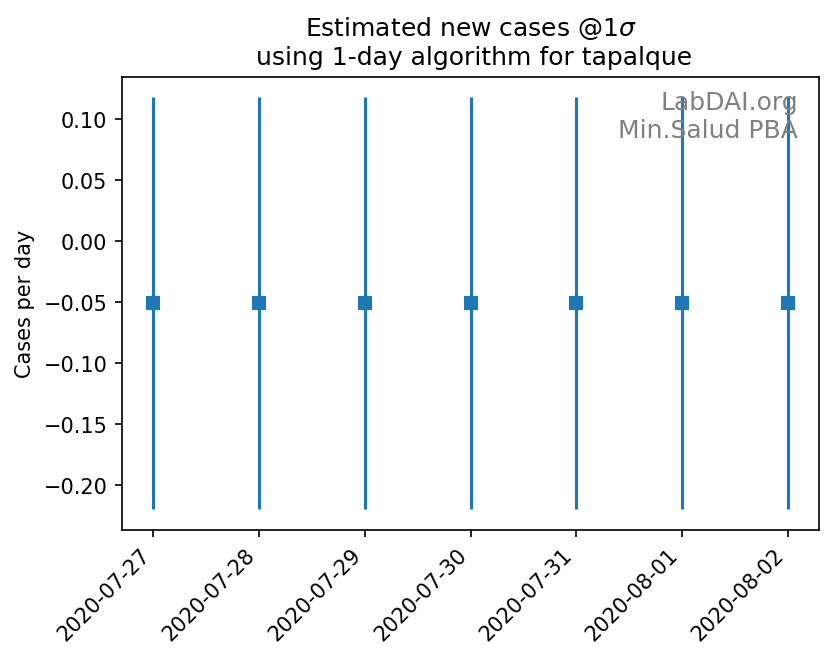

In [58]:
testlist = absolute0
#x = range(len(testlist))
x = [x[-1] for x in testlist]
y = [x[1] for x in testlist]
e = [x[2] for x in testlist]
plt.figure(dpi=150)
plt.errorbar(x, y, yerr=e, fmt='s')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cases per day')
plt.title('Estimated new cases @$1\sigma$\n using 1-day algorithm for '+str(testlist[0][0]))
plt.text(.97,.97,'LabDAI.org\nMin.Salud PBA',ha='right',va='top', fontsize=12, color='gray',transform = plt.gca().transAxes)
#if not os.path.isdir('figs'): os.makedirs('figs')
plt.savefig('figs/'+str(today)+'time_evolution_for_last_7-days_for'+testmuni+'.png',bbox_inches='tight')
plt.show()